<a href="https://colab.research.google.com/github/zezinho222/Metodos-Formais/blob/main/Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install z3-solver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 MB 9.3 MB/s eta 0:00:00


Consider the feature model in the following paper: https://dl.acm.org/doi/fullHtml/10.1145/3442391.3442408


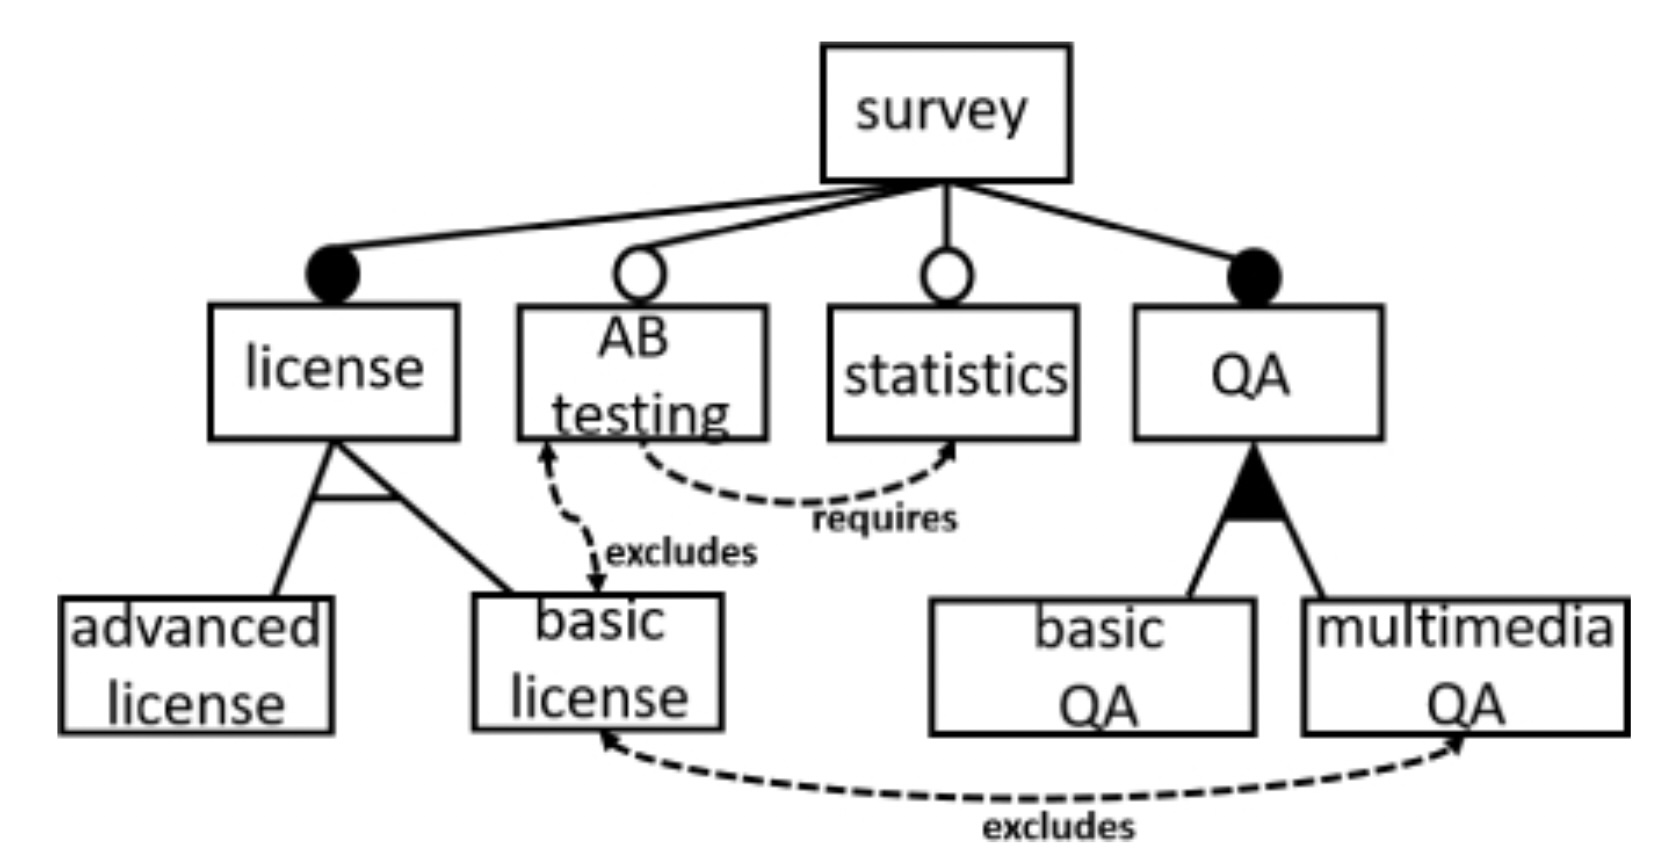

Use Z3 to perform the following analyses:

*   Is the feature model void?
*   How many variants exist?
*   If AB testing was mandatory what would be the core features?
*   If Basic QA required AB testing would there be dead features?

In [4]:
from z3 import *

Survey,License,ABtesting,Statistics,QA,Advancedlicense,Basiclicense,BasicQA,MultimediaQA = Bools("Survey License ABtesting Statistics QA Advancedlicense Basiclicense BasicQA MultimediaQA")
features = [Survey,License,ABtesting,Statistics,QA,Advancedlicense,Basiclicense,BasicQA,MultimediaQA]

s = Solver()

# Survey is a root reature
s.add(Survey)
# Calls is a mandatory sub-feature of Survey
s.add(License == Survey)
# GPS is an optional sub-feature of Survey
s.add(Implies(ABtesting,Survey))
# GPS is an optional sub-feature of Survey
s.add(Implies(Statistics,Survey))
# Screen is a mandatory sub-feature of Survey
s.add(QA == Survey)
# Basic, Colour, and Highres are xor sub-features of Screen
s.add(Or(Advancedlicense,Basiclicense) == License)
s.add(Not(And(Advancedlicense,Basiclicense)))
# Camera and MP3 are or sub-features of Media
s.add(Or(BasicQA,MultimediaQA) == QA)
# Basiclicense excludes MultimediaQA
s.add(Not(And(Basiclicense,MultimediaQA)))
# Basiclicense excludes ABtesting
s.add(Not(And(Basiclicense,ABtesting)))
# ABtesting requires Statistics
s.add(Implies(ABtesting, Statistics))

#Is the feature model void?

if s.check() == sat:
  print("Feature model is non void")
else:
  print("Feature model is void")

#How many variants exist?

s.push()
i = 0
while s.check() == sat:
  i += 1
  m = s.model()
  p = []
  for f in features:
    if is_true(m[f]):
      p.append(f)
    else:
      p.append(Not(f))
  s.add(Not(And(p)))
print("There are " + str(i) + " possible products!")
s.pop()

#If AB testing was mandatory what would be the core features?

s.add(ABtesting == Survey)

if s.check() == sat:
  print("Feature model is non void")
else:
  print("Feature model is void")

#VER SE ESTA CORRETO
#If Basic QA required AB testing would there be dead features?
#BasicQA requer ABtesting
s.add(Implies(BasicQA, ABtesting))

# Verificando se há features mortas
dead_features = []
for f in features:
    s.push()
    # Forçamos a feature a estar presente
    s.add(f)
    if s.check() == unsat:
        dead_features.append(f)  # Se for insatisfatível, a feature está morta
    s.pop()

if dead_features:
    print("Dead features:", dead_features)
else:
    print("No dead features")



Feature model is non void
There are 11 possible products!
Feature model is non void
Dead features: [Basiclicense]
